## Google Colab

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
df=pd.read_csv('/content/drive/My Drive/Untitled folder/Untitled Folder/churn_data.csv')

df

df1=pd.read_csv('/content/drive/My Drive/Untitled folder/Untitled Folder/customer_data.csv')

df1

df2=pd.read_csv('/content/drive/My Drive/Untitled folder/Untitled Folder/internet_data.csv')

df2

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [9]:
## Merging the Dataframe

df_new=df.merge(df1,how='inner',on='customerID')

df_new

df_new1=df_new.merge(df2,how='inner',on='customerID')

df_new1

df_new1.isnull().sum()

df_new1.skew()

df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:


## Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new1['Churn']=le.fit_transform(df_new1['Churn'])

df_new1


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,0,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,0,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,1,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [15]:
df_new1['TotalCharges']=pd.to_numeric(df_new1['TotalCharges'],errors='coerce')
df_new1.info()
df_new1.isnull().sum()
df_new1['TotalCharges'].fillna(value=df_new1['TotalCharges'].mean(),inplace=True)

df_new1['PhoneService']=le.fit_transform(df_new1['PhoneService'])
df_new1['Contract']=le.fit_transform(df_new1['Contract'])
df_new1['PaperlessBilling']=le.fit_transform(df_new1['PaperlessBilling'])
df_new1['PaymentMethod']=le.fit_transform(df_new1['PaymentMethod'])
df_new1['gender']=le.fit_transform(df_new1['gender'])
df_new1['Partner']=le.fit_transform(df_new1['Partner'])
df_new1['Dependents']=le.fit_transform(df_new1['Dependents'])
df_new1['MultipleLines']=le.fit_transform(df_new1['MultipleLines'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   int64  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   int64  
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [16]:
df_new1

final=df_new1.drop('customerID',1)

final

d1=pd.get_dummies(final,drop_first=True)

d1

d1.info()

d1.skew()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   int64  
 1   PhoneService                          7043 non-null   int64  
 2   Contract                              7043 non-null   int64  
 3   PaperlessBilling                      7043 non-null   int64  
 4   PaymentMethod                         7043 non-null   int64  
 5   MonthlyCharges                        7043 non-null   float64
 6   TotalCharges                          7043 non-null   float64
 7   Churn                                 7043 non-null   int64  
 8   gender                                7043 non-null   int64  
 9   SeniorCitizen                         7043 non-null   int64  
 10  Partner                               7043 non-null   int64  
 11  Dependents       

tenure                                  0.239540
PhoneService                           -2.727153
Contract                                0.630959
PaperlessBilling                       -0.375396
PaymentMethod                          -0.170129
MonthlyCharges                         -0.220524
TotalCharges                            0.962394
Churn                                   1.063031
gender                                 -0.019031
SeniorCitizen                           1.833633
Partner                                 0.067922
Dependents                              0.875199
MultipleLines                           0.118719
InternetService_Fiber optic             0.243494
InternetService_No                      1.375769
OnlineSecurity_No internet service      1.375769
OnlineSecurity_Yes                      0.943722
OnlineBackup_No internet service        1.375769
OnlineBackup_Yes                        0.652817
DeviceProtection_No internet service    1.375769
DeviceProtection_Yes

In [0]:

y=d1['Churn'].values
x=d1.drop('Churn',1).values

## Training the model

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [18]:
!pip show tensorflow


Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: protobuf, gast, astunparse, grpcio, keras-preprocessing, absl-py, six, h5py, scipy, google-pasta, termcolor, tensorboard, opt-einsum, tensorflow-estimator, wrapt, numpy, wheel
Required-by: fancyimpute


In [0]:
!pip install -q keras


In [21]:
x_train.shape

(5282, 26)

In [22]:
y_train.shape

(5282,)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
model = Sequential()


model.add(Dense(units=26,activation='relu'))

model.add(Dense(units=13,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:

model.fit(x=x_train, 
          y=y_train, 
          epochs=200,
          validation_data=(x_test, y_test), verbose=1
          )

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

166/166 [==============================] - 1s 5ms/step - loss: 4.6526 - val_loss: 0.5285
Epoch 2/200
166/166 [==============================] - 1s 4ms/step - loss: 1.0090 - val_loss: 1.8581
Epoch 3/200
166/166 [==============================] - 1s 4ms/step - loss: 1.6141 - val_loss: 1.7385
Epoch 4/200
166/166 [==============================] - 1s 4ms/step - loss: 0.8069 - val_loss: 0.7744
Epoch 5/200
166/166 [==============================] - 1s 4ms/step - loss: 0.6958 - val_loss: 0.5563
Epo

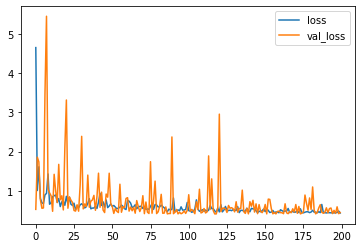

In [30]:
pd.DataFrame(model.history.history).plot()

In [0]:
model = Sequential()


model.add(Dense(units=26,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=13,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [49]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=200,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

166/166 [==============================] - 1s 5ms/step - loss: 41.3800 - val_loss: 2.3951
Epoch 2/200
166/166 [==============================] - 1s 4ms/step - loss: 8.1204 - val_loss: 0.8741
Epoch 3/200
166/166 [==============================] - 1s 4ms/step - loss: 2.6048 - val_loss: 0.6826
Epoch 4/200
166/166 [==============================] - 1s 5ms/step - loss: 1.3425 - val_loss: 0.6513
Epoch 5/200
166/166 [==============================] - 1s 4ms/step - loss: 1.0546 - val_loss: 0.6288
Ep

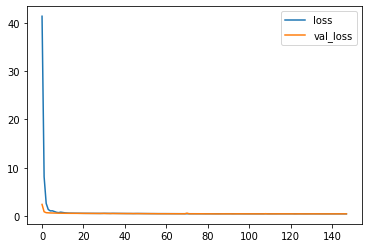

In [50]:
pd.DataFrame(model.history.history).plot()

In [0]:
predictions = model.predict_classes(x_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1279
           1       0.77      0.34      0.47       482

    accuracy                           0.79      1761
   macro avg       0.78      0.65      0.67      1761
weighted avg       0.79      0.79      0.76      1761

[[1230   49]
 [ 318  164]]
